| 동작              | 방법                              |
| --------------- | ------------------------------- |
| ✅ segment 클릭    | 마우스로 이미지 클릭                     |
| 👀 segment 미리보기 | 클릭하면 초록색 preview mask 표시        |
| 🔒 확정           | `Enter` 키 누르면 확정 → 빨간색 mask로 변경 |
| ↩️ Undo         | `u` 키 누르면 마지막 확정 취소             |
| 🛑 종료           | `ESC` 키 누르면 세그먼트 종료 및 최종 결과 출력  |


c:\Users\khu\anaconda3\envs\samclip\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\khu\anaconda3\envs\samclip\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\khu\anaconda3\envs\samclip\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


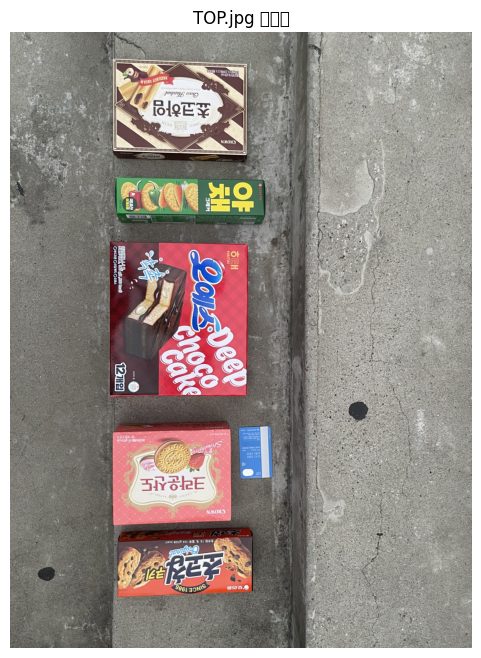

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 이미지 경로
image_path = r"C:\Users\khu\Downloads\CHAN\cvSH\cvSH\project_dino_midas_new\images\TOP.jpg"

# 이미지 읽기 (BGR 형식)
image_bgr = cv2.imread(image_path)

# BGR을 RGB로 변환
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 이미지 출력
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Image")
plt.show()

📍 클릭 좌표 (창): (93, 319) → 원본: (401, 1376)
✅ segment 확정 (1개)
📍 클릭 좌표 (창): (205, 343) → 원본: (884, 1479)
✅ segment 확정 (2개)
📍 클릭 좌표 (창): (323, 311) → 원본: (1393, 1341)
✅ segment 확정 (3개)
📍 클릭 좌표 (창): (550, 322) → 원본: (2372, 1389)
✅ segment 확정 (4개)
📍 클릭 좌표 (창): (709, 321) → 원본: (3058, 1384)
✅ segment 확정 (5개)
📍 클릭 좌표 (창): (561, 284) → 원본: (2420, 1225)
✅ segment 확정 (6개)
🛑 종료합니다

🔹 1번째 item의 꼭짓점 좌표는 다음과 같습니다:
    (x=154, y=2002)
    (x=721, y=1278)
    (x=183, y=1266)
    (x=692, y=1991)

🔹 2번째 item의 꼭짓점 좌표는 다음과 같습니다:
    (x=828, y=1991)
    (x=1030, y=1162)
    (x=1067, y=1948)
    (x=830, y=1177)

🔹 3번째 item의 꼭짓점 좌표는 다음과 같습니다:
    (x=1180, y=2022)
    (x=2029, y=1267)
    (x=1194, y=1263)
    (x=2040, y=2017)

🔹 4번째 item의 꼭짓점 좌표는 다음과 같습니다:
    (x=2757, y=2001)
    (x=2187, y=1377)
    (x=2734, y=1355)
    (x=2216, y=1987)

🔹 5번째 item의 꼭짓점 좌표는 다음과 같습니다:
    (x=3122, y=1230)
    (x=2836, y=1976)
    (x=2781, y=1248)
    (x=3163, y=1976)

📌 기준 카드의 꼭짓점 좌표는 다음과 같습니다:
    (x=2498, y=1293)
    (x=2216

C:\Users\khu\AppData\Local\Temp\ipykernel_11236\2267382902.py:110: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(confirmed_masks))


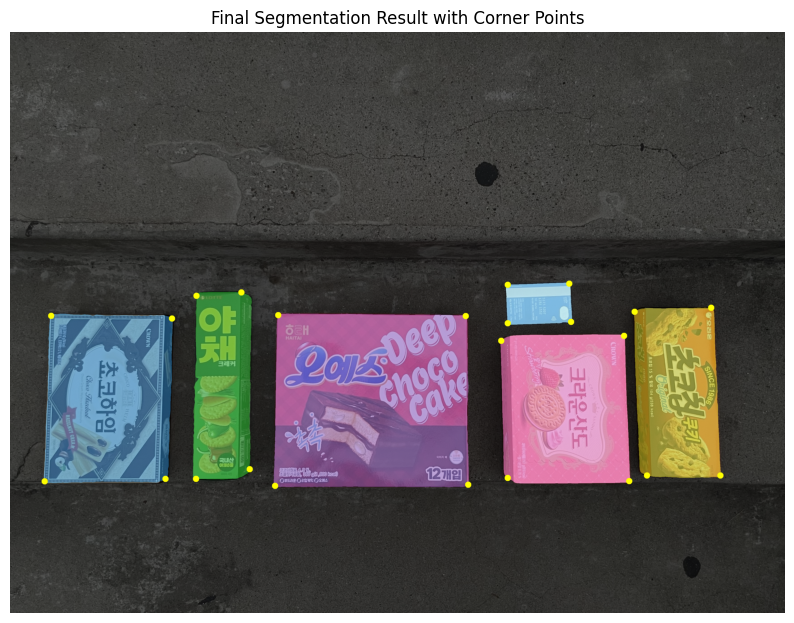

💾 결과 저장 완료: c:\Users\khu\Downloads\CHAN\cvSH\cvSH\project_dino_midas_new\segmentation_result.jpg


In [8]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from segment_anything import sam_model_registry, SamPredictor
import cv2
import os

# -------------------- 설정 --------------------
sam_checkpoint = r"C:\Users\khu\Downloads\CHAN\cvSH\cvSH\project_dino_midas_new\segment-anything\checkpoint\sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"
display_width = 800
display_height = 600

# -------------------- 모델 로드 --------------------
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)
predictor = SamPredictor(sam)

# -------------------- 이미지 로드 --------------------
image_path = r"C:\Users\khu\Downloads\CHAN\cvSH\cvSH\project_dino_midas_new\images\TOP.jpg"
image_bgr = cv2.imread(image_path)
if image_bgr is None:
    raise FileNotFoundError(f"이미지를 찾을 수 없습니다: {image_path}")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
predictor.set_image(image_rgb)

# 비율 유지 리사이징 계산
resize_scale = min(display_width / image_rgb.shape[1],
                   display_height / image_rgb.shape[0])
resized_width = int(image_rgb.shape[1] * resize_scale)
resized_height = int(image_rgb.shape[0] * resize_scale)
resize_scale_x = resize_scale
resize_scale_y = resize_scale

# -------------------- 상태 변수 --------------------
confirmed_masks = []
confirmed_points = []
pending_mask = None
pending_point = None

# -------------------- 마우스 이벤트 --------------------
def on_mouse(event, x, y, flags, param):
    global pending_mask, pending_point

    if event == cv2.EVENT_LBUTTONDOWN:
        x_orig = int(x / resize_scale_x)
        y_orig = int(y / resize_scale_y)
        print(f"📍 클릭 좌표 (창): ({x}, {y}) → 원본: ({x_orig}, {y_orig})")

        input_point = np.array([[x_orig, y_orig]])
        input_label = np.array([1])

        masks, scores, _ = predictor.predict(
            point_coords=input_point,
            point_labels=input_label,
            multimask_output=True
        )

        pending_mask = masks[np.argmax(scores)]
        pending_point = (x, y)

# -------------------- 시각화 --------------------
def draw_preview():
    display = image_rgb.copy()
    for mask in confirmed_masks:
        display[mask] = [255, 0, 0]
    if pending_mask is not None:
        display[pending_mask] = [0, 255, 0]
    return display

# -------------------- OpenCV 인터랙션 --------------------
cv2.namedWindow("SAM Segment")
cv2.setMouseCallback("SAM Segment", on_mouse)

while True:
    canvas_raw = draw_preview()
    canvas = cv2.resize(canvas_raw, (resized_width, resized_height))

    for pt in confirmed_points:
        cv2.circle(canvas, pt, 4, (0, 0, 255), -1)
    if pending_point:
        cv2.circle(canvas, pending_point, 4, (0, 255, 0), -1)

    cv2.imshow("SAM Segment", cv2.cvtColor(canvas, cv2.COLOR_RGB2BGR))
    key = cv2.waitKey(1)

    if key == 13 and pending_mask is not None:
        confirmed_masks.append(pending_mask.copy())
        confirmed_points.append(pending_point)
        print(f"✅ segment 확정 ({len(confirmed_masks)}개)")
        pending_mask = None
        pending_point = None

    elif key == ord('u') and confirmed_masks:
        confirmed_masks.pop()
        confirmed_points.pop()
        print("↩️ Undo 수행: 마지막 segment 제거")

    elif key == 27:
        print("🛑 종료합니다")
        break

cv2.destroyAllWindows()

# -------------------- 최종 마스크 시각화 및 꼭짓점 표시 --------------------
if confirmed_masks:
    color_mask = np.zeros_like(image_rgb, dtype=np.uint8)
    cmap = cm.get_cmap('tab20', len(confirmed_masks))

    for idx, mask in enumerate(confirmed_masks):
        rgba = cmap(idx)
        color = [int(255 * c) for c in rgba[:3]]
        for c in range(3):
            color_mask[:, :, c][mask] = color[c]

    alpha = 0.6
    blended = cv2.addWeighted(image_rgb, 1 - alpha, color_mask, alpha, 0)

    # 각 마스크에서 꼭짓점 추출 + 시각화 + 출력
    for idx, mask in enumerate(confirmed_masks):
        contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            cnt = max(contours, key=cv2.contourArea)
            epsilon = 0.01 * cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, epsilon, True)

            if len(approx) >= 4:
                pts = approx[:, 0, :]
                selected_pts = []

                center = np.mean(pts, axis=0)
                first = pts[np.argmax(np.linalg.norm(pts - center, axis=1))]
                selected_pts.append(first)

                for _ in range(3):
                    dists = np.array([min(np.linalg.norm(p - s) for s in selected_pts) for p in pts])
                    next_pt = pts[np.argmax(dists)]
                    selected_pts.append(next_pt)

                # 좌표 출력
                if idx == len(confirmed_masks) - 1:
                    print(f"\n📌 기준 카드의 꼭짓점 좌표는 다음과 같습니다:")
                else:
                    print(f"\n🔹 {idx + 1}번째 item의 꼭짓점 좌표는 다음과 같습니다:")
                for pt in selected_pts:
                    print(f"    (x={int(pt[0])}, y={int(pt[1])})")

                # 시각화 (노란 점)
                for pt in selected_pts:
                    x, y = int(pt[0]), int(pt[1])
                    cv2.circle(blended, (x, y), 14, (255, 255, 0), -1)

    plt.figure(figsize=(10, 10))
    plt.imshow(blended)
    plt.title("Final Segmentation Result with Corner Points")
    plt.axis('off')
    plt.show()

    save_path = "segmentation_result.jpg"
    cv2.imwrite(save_path, cv2.cvtColor(blended, cv2.COLOR_RGB2BGR))
    print(f"💾 결과 저장 완료: {os.path.abspath(save_path)}")
else:
    print("❗ 확정된 segment가 없습니다.")

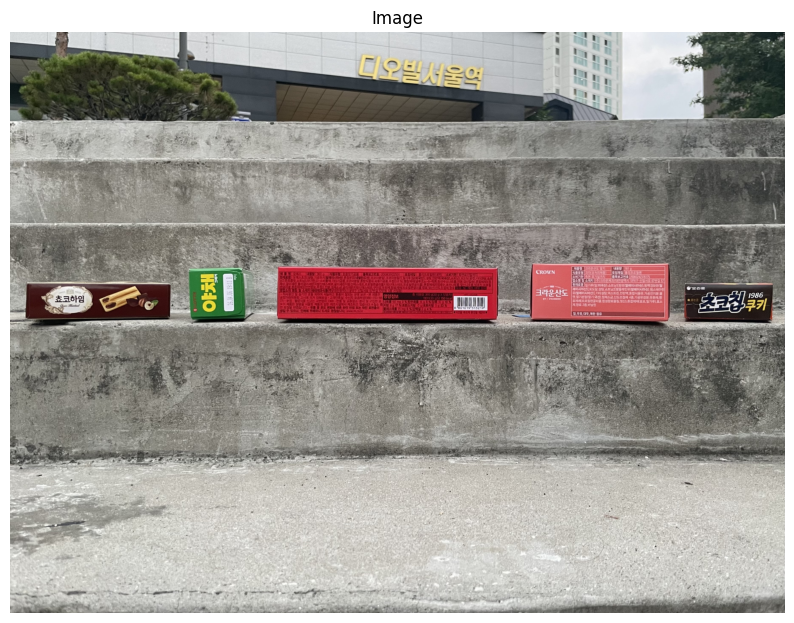

In [9]:
import cv2
import matplotlib.pyplot as plt

# 이미지 경로
image_path = r"C:\Users\khu\Downloads\CHAN\cvSH\cvSH\project_dino_midas_new\images\FRONT.jpg"

# 이미지 읽기 (BGR 형식)
image_bgr = cv2.imread(image_path)

# BGR을 RGB로 변환
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 이미지 출력
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Image")
plt.show()

📍 클릭 좌표 (창): (142, 263) → 원본: (646, 1197)
✅ segment 확정 (1개)
📍 클릭 좌표 (창): (191, 262) → 원본: (869, 1193)
✅ segment 확정 (2개)
📍 클릭 좌표 (창): (500, 272) → 원본: (2276, 1238)
✅ segment 확정 (3개)
📍 클릭 좌표 (창): (561, 284) → 원본: (2554, 1293)
✅ segment 확정 (4개)
📍 클릭 좌표 (창): (727, 266) → 원본: (3310, 1211)
✅ segment 확정 (5개)
🛑 종료합니다

🔹 1번째 item의 꼭짓점 좌표는 다음과 같습니다:
    (x=80, y=1192)
    (x=750, y=1332)
    (x=88, y=1348)
    (x=742, y=1186)

🔹 2번째 item의 꼭짓점 좌표는 다음과 같습니다:
    (x=846, y=1119)
    (x=1132, y=1330)
    (x=854, y=1346)
    (x=1076, y=1111)

🔹 3번째 item의 꼭짓점 좌표는 다음과 같습니다:
    (x=1261, y=1115)
    (x=2288, y=1338)
    (x=1269, y=1349)
    (x=2282, y=1114)

🔹 4번째 item의 꼭짓점 좌표는 다음과 같습니다:
    (x=2455, y=1102)
    (x=3096, y=1342)
    (x=2463, y=1353)
    (x=3093, y=1096)

🔹 5번째 item의 꼭짓점 좌표는 다음과 같습니다:
    (x=3175, y=1191)
    (x=3582, y=1351)
    (x=3182, y=1357)
    (x=3580, y=1186)


C:\Users\khu\AppData\Local\Temp\ipykernel_11236\2225438259.py:110: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(confirmed_masks))


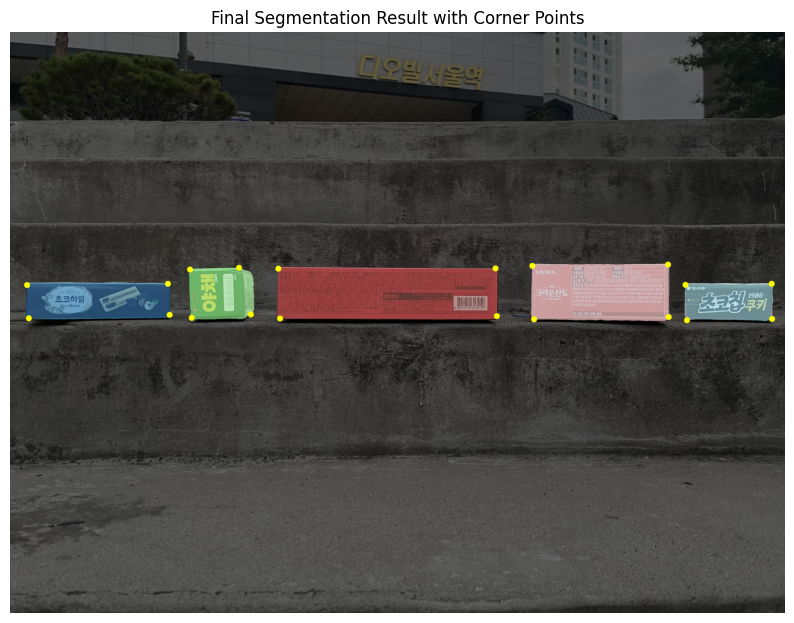

💾 결과 저장 완료: c:\Users\khu\Downloads\CHAN\cvSH\cvSH\project_dino_midas_new\segmentation_result.jpg


In [11]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from segment_anything import sam_model_registry, SamPredictor
import cv2
import os

# -------------------- 설정 --------------------
sam_checkpoint = r"C:\Users\khu\Downloads\CHAN\cvSH\cvSH\project_dino_midas_new\segment-anything\checkpoint\sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"
display_width = 800
display_height = 600

# -------------------- 모델 로드 --------------------
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)
predictor = SamPredictor(sam)

# -------------------- 이미지 로드 --------------------
image_path = r"C:\Users\khu\Downloads\CHAN\cvSH\cvSH\project_dino_midas_new\images\FRONT.jpg"
image_bgr = cv2.imread(image_path)
if image_bgr is None:
    raise FileNotFoundError(f"이미지를 찾을 수 없습니다: {image_path}")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
predictor.set_image(image_rgb)

# 비율 유지 리사이징 계산
resize_scale = min(display_width / image_rgb.shape[1],
                   display_height / image_rgb.shape[0])
resized_width = int(image_rgb.shape[1] * resize_scale)
resized_height = int(image_rgb.shape[0] * resize_scale)
resize_scale_x = resize_scale
resize_scale_y = resize_scale

# -------------------- 상태 변수 --------------------
confirmed_masks = []
confirmed_points = []
pending_mask = None
pending_point = None

# -------------------- 마우스 이벤트 --------------------
def on_mouse(event, x, y, flags, param):
    global pending_mask, pending_point

    if event == cv2.EVENT_LBUTTONDOWN:
        x_orig = int(x / resize_scale_x)
        y_orig = int(y / resize_scale_y)
        print(f"📍 클릭 좌표 (창): ({x}, {y}) → 원본: ({x_orig}, {y_orig})")

        input_point = np.array([[x_orig, y_orig]])
        input_label = np.array([1])

        masks, scores, _ = predictor.predict(
            point_coords=input_point,
            point_labels=input_label,
            multimask_output=True
        )

        pending_mask = masks[np.argmax(scores)]
        pending_point = (x, y)

# -------------------- 시각화 --------------------
def draw_preview():
    display = image_rgb.copy()
    for mask in confirmed_masks:
        display[mask] = [255, 0, 0]
    if pending_mask is not None:
        display[pending_mask] = [0, 255, 0]
    return display

# -------------------- OpenCV 인터랙션 --------------------
cv2.namedWindow("SAM Segment")
cv2.setMouseCallback("SAM Segment", on_mouse)

while True:
    canvas_raw = draw_preview()
    canvas = cv2.resize(canvas_raw, (resized_width, resized_height))

    for pt in confirmed_points:
        cv2.circle(canvas, pt, 4, (0, 0, 255), -1)
    if pending_point:
        cv2.circle(canvas, pending_point, 4, (0, 255, 0), -1)

    cv2.imshow("SAM Segment", cv2.cvtColor(canvas, cv2.COLOR_RGB2BGR))
    key = cv2.waitKey(1)

    if key == 13 and pending_mask is not None:
        confirmed_masks.append(pending_mask.copy())
        confirmed_points.append(pending_point)
        print(f"✅ segment 확정 ({len(confirmed_masks)}개)")
        pending_mask = None
        pending_point = None

    elif key == ord('u') and confirmed_masks:
        confirmed_masks.pop()
        confirmed_points.pop()
        print("↩️ Undo 수행: 마지막 segment 제거")

    elif key == 27:
        print("🛑 종료합니다")
        break

cv2.destroyAllWindows()

# -------------------- 최종 마스크 시각화 및 꼭짓점 표시 --------------------
if confirmed_masks:
    color_mask = np.zeros_like(image_rgb, dtype=np.uint8)
    cmap = cm.get_cmap('tab20', len(confirmed_masks))

    for idx, mask in enumerate(confirmed_masks):
        rgba = cmap(idx)
        color = [int(255 * c) for c in rgba[:3]]
        for c in range(3):
            color_mask[:, :, c][mask] = color[c]

    alpha = 0.6
    blended = cv2.addWeighted(image_rgb, 1 - alpha, color_mask, alpha, 0)

    # 각 마스크에서 꼭짓점 추출 + 시각화 + 출력
    for idx, mask in enumerate(confirmed_masks):
        contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            cnt = max(contours, key=cv2.contourArea)
            epsilon = 0.01 * cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, epsilon, True)

            if len(approx) >= 4:
                pts = approx[:, 0, :]
                selected_pts = []

                center = np.mean(pts, axis=0)
                first = pts[np.argmax(np.linalg.norm(pts - center, axis=1))]
                selected_pts.append(first)

                for _ in range(3):
                    dists = np.array([min(np.linalg.norm(p - s) for s in selected_pts) for p in pts])
                    next_pt = pts[np.argmax(dists)]
                    selected_pts.append(next_pt)

                # 좌표 출력
                if idx == len(confirmed_masks) - 1:
                    print(f"\n🔹 {idx + 1}번째 item의 꼭짓점 좌표는 다음과 같습니다:")
                else:
                    print(f"\n🔹 {idx + 1}번째 item의 꼭짓점 좌표는 다음과 같습니다:")
                for pt in selected_pts:
                    print(f"    (x={int(pt[0])}, y={int(pt[1])})")

                # 시각화 (노란 점)
                for pt in selected_pts:
                    x, y = int(pt[0]), int(pt[1])
                    cv2.circle(blended, (x, y), 14, (255, 255, 0), -1)

    plt.figure(figsize=(10, 10))
    plt.imshow(blended)
    plt.title("Final Segmentation Result with Corner Points")
    plt.axis('off')
    plt.show()

    save_path = "segmentation_result.jpg"
    cv2.imwrite(save_path, cv2.cvtColor(blended, cv2.COLOR_RGB2BGR))
    print(f"💾 결과 저장 완료: {os.path.abspath(save_path)}")
else:
    print("❗ 확정된 segment가 없습니다.")

In [ ]:
import pandas as pd
import numpy as np

def get_width_height_px(box):
    """
    box: [ (x1,y1),..., (x4,y4) ]
    네 점의 모든 쌍 거리 중 대각선(가장 긴 두 개)을 제외한
    나머지 변 길이 네 개에서 가장 긴 것을 width_px,
    가장 짧은 것을 height_px로 반환
    """
    dists = []
    for i in range(4):
        for j in range(i+1, 4):
            pi = np.array(box[i]); pj = np.array(box[j])
            dists.append(np.linalg.norm(pi-pj))
    dists = sorted(dists)
    side = dists[:4]  # 앞 네 개가 변 길이
    return max(side), min(side)


# --- 1) CSV 로딩 ---
df1 = pd.read_csv('validation1.csv')
df2 = pd.read_csv('validation2.csv')

# --- 2) 기준 카드 스케일 계산 ---
# object_id == 'card' 인 행 찾기
card_row = df1[df1['object_id']=='card'].iloc[0]
card_box = [
    (card_row.x1, card_row.y1),
    (card_row.x2, card_row.y2),
    (card_row.x3, card_row.y3),
    (card_row.x4, card_row.y4),
]
card_w_px, _ = get_width_height_px(card_box)
real_card_width_mm = 85.6
scale_mm_per_px = real_card_width_mm / card_w_px
print(f"[스케일] {scale_mm_per_px:.4f} mm/px (카드 픽셀 너비: {card_w_px:.1f}px)\n")

# --- 3) 첫 번째 사진: 모든 객체 가로·세로 계산 (mm) ---
results1 = []
for _, row in df1.iterrows():
    box = [(row.x1, row.y1),(row.x2, row.y2),
           (row.x3, row.y3),(row.x4, row.y4)]
    w_px, h_px = get_width_height_px(box)
    results1.append({
        'object_id': row.object_id,
        'width_mm':  w_px * scale_mm_per_px -1 ,
        'height_mm': h_px * scale_mm_per_px
    })

res1 = pd.DataFrame(results1)
print("=== 첫 번째 사진 측정 결과 ===")
print(res1.to_string(index=False))

# --- 4) 두 번째 사진: 높이(height_mm) 계산 (mm) ---
# (가로 길이는 첫 사진 결과 재활용 가능)
results2 = []
for _, row in df2.iterrows():
    box = [(row.x1, row.y1),(row.x2, row.y2),
           (row.x3, row.y3),(row.x4, row.y4)]
    _, h_px = get_width_height_px(box)
    results2.append({
        'object_id': row.object_id,
        'depth_mm': h_px * scale_mm_per_px -1
    })

res2 = pd.DataFrame(results2)

# 5) 병합 및 10으로 나눈 뒤 내림(floor)
df = pd.merge(res1, res2, on='object_id')
df['width']  = np.floor(df['width_mm']  / 10).astype(int)
df['height'] = np.floor(df['height_mm'] / 10).astype(int)
df['depth']  = np.floor(df['depth_mm']  / 10).astype(int)

# 6) 최종 CSV 저장
final = df[['object_id', 'width', 'height', 'depth']]
final.to_csv('/mnt/data/final_measured.csv', index=False)

print("Saved final_measured.csv:")
print(final)
